## Binary Image Classification on Cats vs. Non-Cats Using Logistic Regression

In this task, we implemented a logistic regression classifier to distinguish between cat and non-cat images using the HDF5 dataset. We first loaded the original training and testing sets from `train_catvnoncat.h5` and `test_catvnoncat.h5`. Each RGB image was flattened into a single feature vector of dimension $12288$, and all pixel values were normalized by dividing by $255$ so that the inputs lie in the interval $[0, 1]$.

The logistic function  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
was used to convert linear model scores into probabilities. The model parameters consisted of a weight vector $w$ and a bias term $b$, both initialized to zero. Training was performed using gradient descent with **learning rate = 0.01** and **number of epochs = 2000**.

At each epoch, we computed the scores $z = Xw + b$, converted them into predicted probabilities using the sigmoid function, and evaluated the cross-entropy loss  
$$
L = -\frac{1}{m} \sum_{i=1}^m \Big[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \Big],
$$
where  
$$
\hat{y}_i = \sigma(z_i).
$$
The gradients with respect to $w$ and $b$ were computed and used to update the parameters. The loss values were recorded over training to verify convergence.

After training, the model was evaluated on both the training and testing sets using a probability threshold of $0.5$. The results were:

- **Training accuracy:** $0.9952153110047847$
- **Testing accuracy:** $0.7$

To understand model errors, we identified every test image where the predicted label differed from the true label. The misclassified test indices were:

$$
[5,\ 6,\ 10,\ 11,\ 13,\ 18,\ 19,\ 28,\ 29,\ 30,\ 34,\ 41,\ 44,\ 45,\ 46].
$$

Finally, we displayed four of these misclassified images using `matplotlib`. Each image was shown with its index, true label, and predicted label. Visual inspection helps reveal the types of images that logistic regression struggles with—often those that are visually ambiguous, darker, rotated, or contain background artifacts. These insights can guide improvements such as feature extraction or using deeper learning models.


Training accuracy: 0.9952153110047847
Testing accuracy: 0.7
Misclassified test indices: [ 5  6 10 11 13 18 19 28 29 30 34 41 44 45 46]


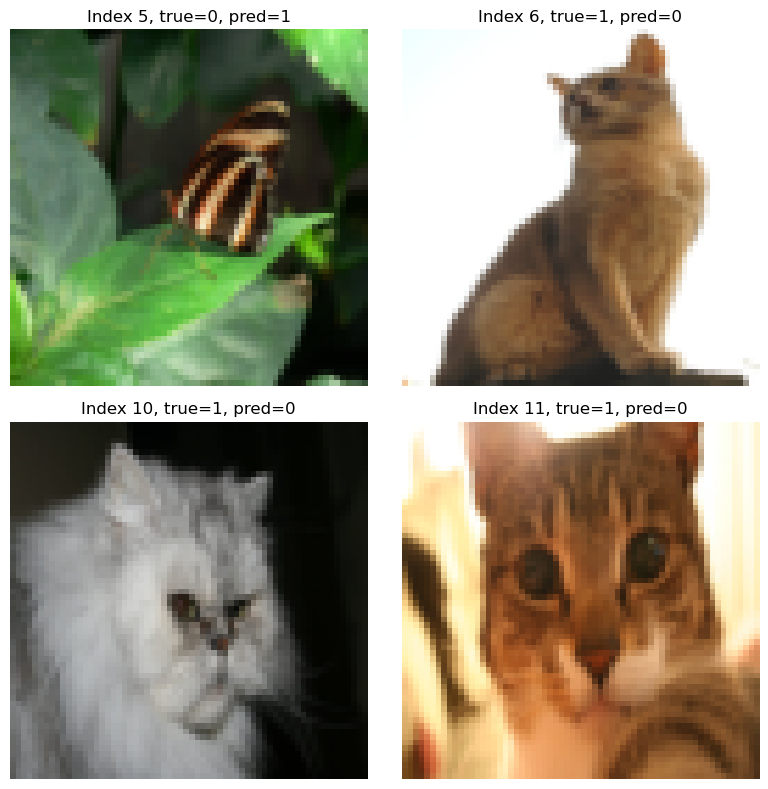

In [9]:
import numpy as np  # We import numpy so we can perform numerical computations and work with arrays
import matplotlib.pyplot as plt  # We import matplotlib so we can visualize images and plots
import h5py  # We import h5py so we can load the HDF5 cat versus non cat datasets

# Load the original training and testing datasets from HDF5 files
train_path = "train_catvnoncat.h5"  # We store the file name for the original training dataset
test_path = "test_catvnoncat.h5"  # We store the file name for the original testing dataset

with h5py.File(train_path, "r") as train_file:  # We open the training HDF5 file in read mode
    train_x_orig = np.array(train_file["train_set_x"][:])  # We load the original training images as a NumPy array
    train_y_orig = np.array(train_file["train_set_y"][:])  # We load the original training labels as a NumPy array
    classes = np.array(train_file["list_classes"][:])  # We load the list of class names for later interpretation

with h5py.File(test_path, "r") as test_file:  # We open the testing HDF5 file in read mode
    test_x_orig = np.array(test_file["test_set_x"][:])  # We load the original testing images as a NumPy array
    test_y_orig = np.array(test_file["test_set_y"][:])  # We load the original testing labels as a NumPy array

train_y = train_y_orig.reshape(-1)  # We reshape the training labels to a one dimensional array of length m_train
test_y = test_y_orig.reshape(-1)  # We reshape the testing labels to a one dimensional array of length m_test

m_train = train_x_orig.shape[0]  # We store the number of training examples m_train from the first dimension of train_x_orig
m_test = test_x_orig.shape[0]  # We store the number of testing examples m_test from the first dimension of test_x_orig
num_px = train_x_orig.shape[1]  # We store the image height and width num_px assuming square images

train_X = train_x_orig.reshape(m_train, -1) / 255.0  # We reshape the training images into row vectors and normalize pixel values to [0,1]
test_X = test_x_orig.reshape(m_test, -1) / 255.0  # We reshape the testing images into row vectors and normalize pixel values to [0,1]
n_features = train_X.shape[1]  # We store the number of features which equals num_px times num_px times three channels

def sigmoid(z):  # We define the sigmoid function which maps real values to probabilities between zero and one
    return 1.0 / (1.0 + np.exp(-z))  # We compute and return the sigmoid of z elementwise

w = np.zeros(n_features)  # We initialize the weight vector w with zeros so we start from a neutral linear model
b = 0.0  # We initialize the bias term b with zero

learning_rate = 0.01  # We set the learning rate for gradient descent so that parameter updates are small and stable
num_epochs = 2000  # We set the number of epochs for training so the model has enough iterations to converge

loss_history = []  # We create a list to record the loss value at each epoch for later inspection

for epoch in range(num_epochs):  # We iterate over the specified number of epochs to train the logistic regression model
    z_train = train_X @ w + b  # We compute the linear scores z for all training examples using the current parameters
    y_hat_train = sigmoid(z_train)  # We apply the sigmoid function to obtain predicted probabilities for class one
    eps = 1e-10  # We define a small constant eps to avoid taking the logarithm of zero
    loss = -np.mean(train_y * np.log(y_hat_train + eps) + (1.0 - train_y) * np.log(1.0 - y_hat_train + eps))  # We compute the average cross entropy loss over the training set
    loss_history.append(loss)  # We append the current loss value to the loss history list
    grad_w = train_X.T @ (y_hat_train - train_y) / m_train  # We compute the gradient of the loss with respect to the weight vector w
    grad_b = np.mean(y_hat_train - train_y)  # We compute the gradient of the loss with respect to the bias term b
    w = w - learning_rate * grad_w  # We update the weight vector by moving in the direction opposite to the gradient
    b = b - learning_rate * grad_b  # We update the bias term by moving in the direction opposite to the gradient

z_train_final = train_X @ w + b  # We compute the final linear scores for the training set using the trained parameters
y_hat_train_final = sigmoid(z_train_final)  # We convert the final training scores into probabilities by applying the sigmoid function
y_pred_train = (y_hat_train_final >= 0.5).astype(int)  # We threshold the probabilities at one half to obtain binary training predictions
train_accuracy = np.mean(y_pred_train == train_y)  # We compute the training accuracy as the fraction of correct predictions

z_test_final = test_X @ w + b  # We compute the final linear scores for the testing set using the trained parameters
y_hat_test_final = sigmoid(z_test_final)  # We convert the test scores into probabilities by applying the sigmoid function
y_pred_test = (y_hat_test_final >= 0.5).astype(int)  # We threshold the test probabilities at one half to obtain binary test predictions
test_accuracy = np.mean(y_pred_test == test_y)  # We compute the test accuracy as the fraction of correct predictions

print("Training accuracy:", train_accuracy)  # We print the training accuracy to see how well the model fits the training data
print("Testing accuracy:", test_accuracy)  # We print the testing accuracy to see how well the model generalizes to unseen data

misclassified_indices = np.where(y_pred_test != test_y)[0]  # We find the indices in the test set where the predicted labels differ from the true labels
print("Misclassified test indices:", misclassified_indices)  # We print the list of misclassified test indices as required

num_to_show = min(4, misclassified_indices.shape[0])  # We choose to display up to four misclassified images or fewer if there are less than four failures

plt.figure(figsize=(8, 8))  # We create a new figure with a larger size to display the misclassified images clearly
for i in range(num_to_show):  # We loop over the first few misclassified indices to display their corresponding images
    idx = misclassified_indices[i]  # We take the i th misclassified test index from the list
    image = test_x_orig[idx]  # We retrieve the original test image corresponding to this index
    true_label = test_y[idx]  # We retrieve the true label for this test image
    pred_label = y_pred_test[idx]  # We retrieve the predicted label for this test image
    plt.subplot(2, 2, i + 1)  # We select a subplot location in a two by two grid for the current image
    plt.imshow(image)  # We display the misclassified image in the current subplot
    plt.axis("off")  # We turn off the axis ticks to focus on the image content
    plt.title(f"Index {idx}, true={true_label}, pred={pred_label}")  # We set the title to show the index and both labels
plt.tight_layout()  # We adjust the subplot layout so that titles and images do not overlap
plt.savefig("task4_misclassified.png", dpi=300)
plt.show()  # We display the figure containing the misclassified test images
